<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Firstly, Importing all libraries</p>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amith
[nltk_data]     Sourya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Function which first removes punctuations from tweet, then removes stopwords(common words)</p>

In [108]:
def message_cleaning(message):
    punc_removed_list = [char for char in message if char not in string.punctuation]
    punc_removed_string = ''.join(punc_removed_list)
    stopword_punc_removed_list = [word for word in punc_removed_string.split() if word.lower() not in stopwords.words('english')]
    return stopword_punc_removed_list

<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Firstly, we are importing data from csv file. Then we are dropping the id as it is not necessary</p>

In [109]:
tweet_df = pd.read_csv('train.csv')
tweet_df = tweet_df.drop(['id'], axis=1)
tweet_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Then we are applying the message cleaning function which we defined above which returns the list of required words</p>

In [110]:
tweet_df_clean = tweet_df['tweet'].apply(message_cleaning)

In [111]:
pd.DataFrame(tweet_df_clean)

,tweet
0,"[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, lyft, credit, cant, use, ..."
2,"[bihday, majesty]"
3,"[model, love, u, take, u, time, urð±, ðð..."
4,"[factsguide, society, motivation]"
...,...
31957,"[ate, user, isz, youuuðððððð..."
31958,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,"[listening, sad, songs, monday, morning, otw, ..."
31960,"[user, sikh, temple, vandalised, calgary, wso,..."


<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Then we are joining those list of words in each tweet as a single string</p>

In [112]:
XString = [" ".join(sentence) for sentence in tweet_df_clean]
pd.DataFrame(XString)

,0
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð± ðððð...
4,factsguide society motivation
...,...
31957,ate user isz youuuððððððð...
31958,see nina turner airwaves trying wrap mantle ge...
31959,listening sad songs monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Then we are applying count vectorization for each <b>cleaned </b>tweet. This in simple words converts english words into numbers.</p>

In [113]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(XString)

In [114]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,43661,43662,43663,43664,43665,43666,43667,43668,43669,43670
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
Now the below table visualizes the feauture's values</p>

In [115]:
pd.DataFrame(vectorizer.get_feature_names())

,0
0,0000001
1,00027
2,001
3,0035
4,00h30
...,...
43666,ð¾ð½ðµð
43667,ð¾ñ
43668,ó¾
43669,øª


In [116]:
y = tweet_df['label']

<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
We are splitting the data</p>

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

<p style="color: #666666; font-family: 'New Roman', serif; font-size: 150%;">
We are using Naive Baye's Classifier</p>

In [118]:
NB_classifier = MultinomialNB()

In [119]:
NB_classifier.fit(xtrain, ytrain)

MultinomialNB()

In [120]:
ypredictTest = NB_classifier.predict(xtest)

In [121]:
print(ypredictTest)

[0 0 0 ... 0 0 0]


In [122]:
cm = confusion_matrix(ytest, ypredictTest)

<AxesSubplot:>

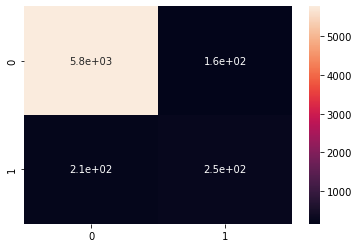

In [123]:
sns.heatmap(cm, annot=True)

In [124]:
print(classification_report(ytest, ypredictTest))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5933
           1       0.62      0.55      0.58       460

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

